In [1]:
#Importing required libraries
import warnings  # required for warning filter
# for Data visulization
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import os #paths to file
import numpy as np # for linear algebra
import pandas as pd # needed for data processing

#For Exploratory data analysis
from pandas_profiling import ProfileReport

#train test split
from sklearn.model_selection import train_test_split

#for pre processing and feature engineering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#used for evaluation metrics
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

#For Model Building
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# for Cross Validation
from sklearn.model_selection import cross_val_score as CVS

#for warning related hadles
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

C:\Users\gogat\AppData\Local\Temp\ipykernel_49292\2104534805.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Fetching the dataset
url = 'data.csv'
data = pd.read_csv(url)
data.head()
data.shape

(14204, 12)

In [5]:
#Understanding the dataset
#Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
#Summary of the data
data.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,14204.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2099.333529
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1542.432736
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,878.856000
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1828.273366
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,2949.298043


In [7]:
#Finding the missing values
print('Missing Values by Count: \n\n',
      data.isnull().sum().sort_values(ascending=True),'\n\nMissing Values by %:\n\n',
      data.isnull().sum().sort_values(ascending=True)/data.shape[0] * 100)

Missing Values by Count: 

 Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                  2439
Outlet_Size                  4016
dtype: int64 

Missing Values by %:

 Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Item_Weight                  17.171219
Outlet_Size                  28.273726
dtype: float64


In [8]:
#Exploring more about the missing values
print('Missing Values in Outlet_Size :\n\n',data.Outlet_Size.value_counts())
print('\nMissing Values in Item_Weight :\n\n',data.Item_Weight.value_counts())

Missing Values in Outlet_Size :

 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Missing Values in Item_Weight :

 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64


In [9]:
# Filling Outlet Size  missing values, as this is a catergorical value filling with the Mode is a best option here
print('Number of Missing Values in Item_Weight: ', len(data[data.Outlet_Size.isnull()]))
missing_values = data.Outlet_Size.isnull()
size_avg = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x:size_avg.loc[x])
print('Number of Missing values after filling: ' , sum(data['Outlet_Size'].isnull()))

Number of Missing Values in Item_Weight:  4016
Number of Missing values after filling:  0


Text(0.5, 1.0, 'Item Wieght Distribution')

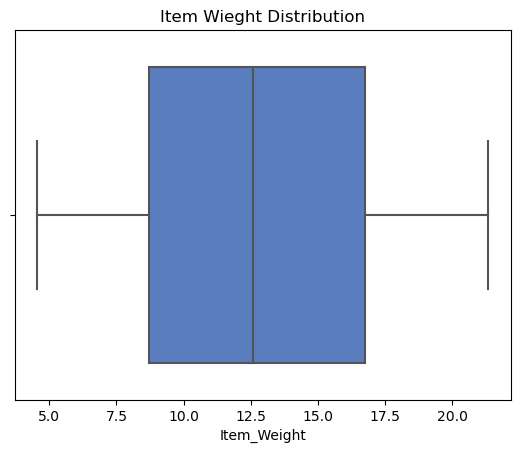

In [10]:
#lets look into Item_weight
#Since it is a numerical value, we need to explore a bit
sns.boxplot(x=data['Item_Weight'], palette='muted')
plt.title('Item Wieght Distribution')

In [11]:
#Here what we did was we wanted to find the missing values of item_weight, looking at the above boxplot we could have 
#directly come to a conclusion to replace Mean for missing values as there are no outliers but just for the confirmation
#We tried again with Linear regression by taking MRP as the input variable using our domain knowledge and compare it with mean result
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Loading the BigMart dataset
df = data
#Checking for missing values
print(df.isnull().sum())

#As we want to fill the values for item_weight, we need to Choose that column
missing_value_column = 'Item_Weight'

# Split the dataset into training and testing sets
train_data = df[df[missing_value_column].notna()]
test_data = df[df[missing_value_column].isna()]

# Mean imputation strategy
mean_impution = SimpleImputer(strategy='mean')
mean_impution.fit(train_data[[missing_value_column]])
test_data[missing_value_column] = mean_impution.transform(test_data[[missing_value_column]])

# Linear regression imputation strategy
regression_impution = LinearRegression()
regression_impution.fit(train_data[['Item_MRP']], train_data[[missing_value_column]])
test_data[missing_value_column] = regression_impution.predict(test_data[['Item_MRP']])

# Evaluate imputation performance using mean squared error
mean_imputation_error = mean_squared_error(test_data[missing_value_column], mean_impution.transform(test_data[[missing_value_column]]))
regression_imputation_error = mean_squared_error(test_data[missing_value_column], regression_impution.predict(test_data[['Item_MRP']]))

print('Mean imputation error: ', mean_imputation_error)
print('Regression imputation error: ', regression_imputation_error)


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Mean imputation error:  0.0
Regression imputation error:  0.0


In [12]:
#After looking at the above result we can safely say that as there is no difference with both the techniques,
#will Proceeding with the mean for replacing with missing values.
print('Missing Values in Item_Weight: ', len(data[data.Item_Weight.isnull()]))
missing_values = data.Item_Weight.isnull()
item_avg_wht = data.pivot_table(values='Item_Weight', index ='Item_Identifier')
data.loc[missing_values, 'Item_Weight'] = data.loc[missing_values, 'Item_Identifier'].apply(lambda x:item_avg_wht.loc[x])
print('Missing values after filling with mean values: ' , sum(data['Item_Weight'].isnull()))

Missing Values in Item_Weight:  2439
Missing values after filling with mean values:  0


In [13]:
#Just confirming that we dont have any missing values
print('Missing Values by Count: \n\n',
      data.isnull().sum().sort_values(ascending=True),'\n\nMissing Values by %:\n\n',
      data.isnull().sum().sort_values(ascending=True)/data.shape[0] * 100)

Missing Values by Count: 

 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64 

Missing Values by %:

 Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64


In [14]:
#Now lets explore more about the variables
#to check about the Numerical variables present
number_df = data.select_dtypes('number')
#to check about the Categorial variables present 
catogorical_df = data.select_dtypes('object')

In [15]:
# first will start with categorical values 
for col in catogorical_df.columns:
    if(col != 'Item_Identifier'):
        print('\nFrequency for %s'%col)
        print('\nTotal Categories: ', len(catogorical_df[col].value_counts()), '\n', catogorical_df[col].value_counts())


Frequency for Item_Fat_Content

Total Categories:  5 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency for Item_Type

Total Categories:  16 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency for Outlet_Identifier

Total Categories:  10 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency for Outlet

In [16]:
#We have repeated values in Item_Fat_Content, lets replace them
data['Item_Fat_Content'] = data.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [17]:
#If we see item type there are many categories listed, but if we see "Item_identifier ID" we could merge the item_type into 3 vcategories
#based on first 2 character indicating FD, DR, NC means food, Drinks, Non-Consumables respectively.
data['Combined_Item_Type'] = data.Item_Identifier.apply(lambda x:x[0:2])
data['Combined_Item_Type'] = data['Combined_Item_Type'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable']) 
data.Combined_Item_Type.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Combined_Item_Type, dtype: int64

In [18]:
#Observing the numerical values
number_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.065953,141.004977,1997.830681,2099.333529
std,4.651716,0.051459,62.086938,8.371664,1542.432736
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,878.856000
50%,12.600000,0.054021,142.247000,1999.000000,1828.273366
75%,16.750000,0.094037,185.855600,2004.000000,2949.298043
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Text(0.5, 1.0, 'Item Outlet Sales Distribution')

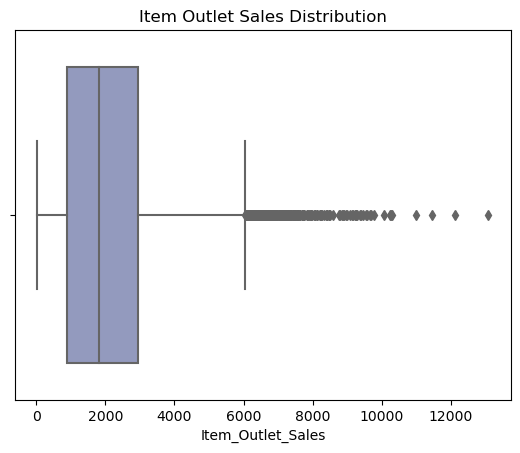

In [19]:
#Box-plot representing Item_Outlet_Sales to see outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution')

In [20]:
#So we could that mean is around 1800 and there are many outliers which we can remove.
def remove_outliers(dataframe,quality):
    q1= dataframe[quality].quantile(0.25)
    q3 = dataframe[quality].quantile(0.75)
    IQR = q3 - q1
    upper_limit = q3 + 1.5 * IQR
    lower_limit = q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = remove_outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

Upper whisker:  6054.961107851272
Lower Whisker:  -2226.8070647107634


Text(0.5, 1.0, 'Item Outlet Sales Distribution')

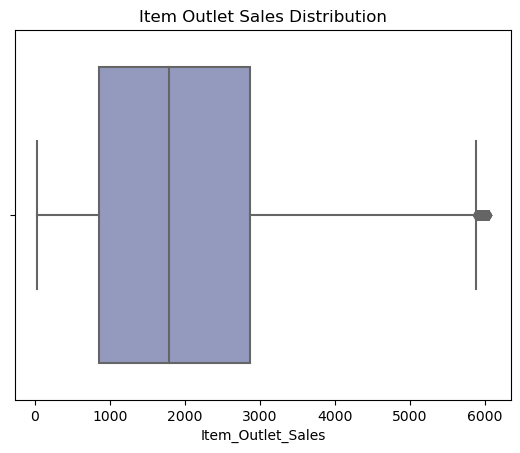

In [21]:
#confirming after removing the outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution')

In [22]:
#Adding a new column outlet_age instead of establishment year
data['Oultet_Age'] = 2023 - data['Outlet_Establishment_Year']

In [23]:
#if we observe the minimum value of item_visibility its zero and it does not make any sense,
#So we can consider it as null value and replace it with average value.
print('Number of Missing Values present in Item_Visibility: ', len(data[number_df['Item_Visibility'] == 0]))
missing_values = (data['Item_Visibility'] == 0)
item_visibility_avg = data.pivot_table(values='Item_Visibility', index ='Item_Identifier')

data.loc[missing_values, 'Item_Visibility'] = data.loc[missing_values, 'Item_Identifier'].apply(lambda x:item_visibility_avg.loc[x])
print('Number of Missing values after filling: ' , sum(data['Item_Visibility'].isnull()))

Number of Missing Values present in Item_Visibility:  858
Number of Missing values after filling:  0


In [24]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Combined_Item_Type,Oultet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,24
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,25
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,36


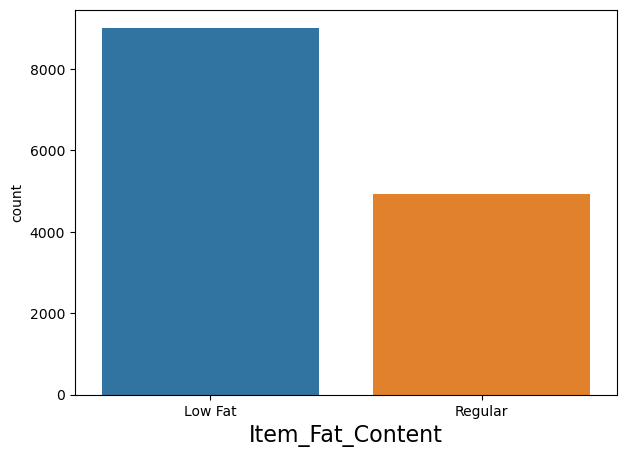

In [25]:
#Looking at the somw of the visualisations to understand the data in more better way.
# plot for fat content
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item_Fat_Content', fontsize=16)
plt.show()

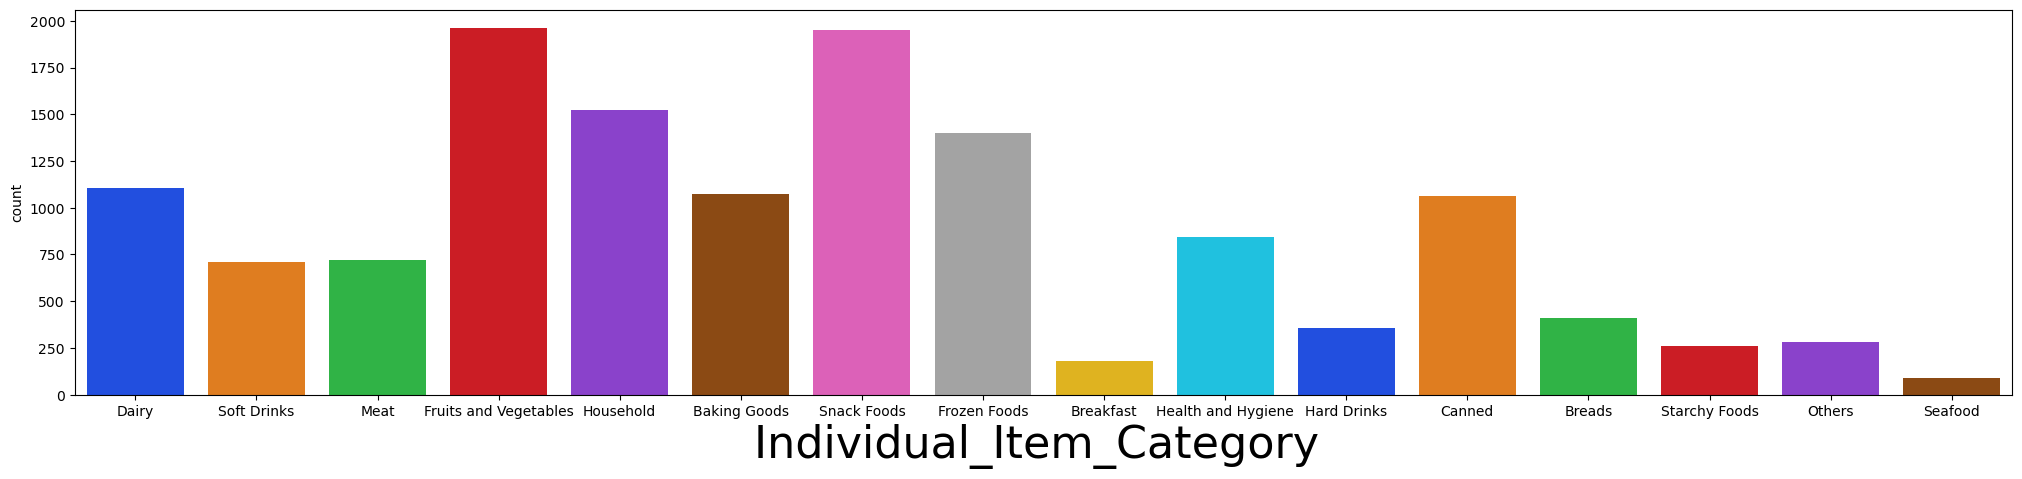

In [26]:
#So from the above graph we could say that, items with low fat content is more sold in that particular store.
#now lets look at the item_category
plt.figure(figsize=(25,5))
sns.countplot(data=data, x='Item_Type',  palette='bright')
plt.xlabel('Individual_Item_Category ', fontsize=32)
plt.show()

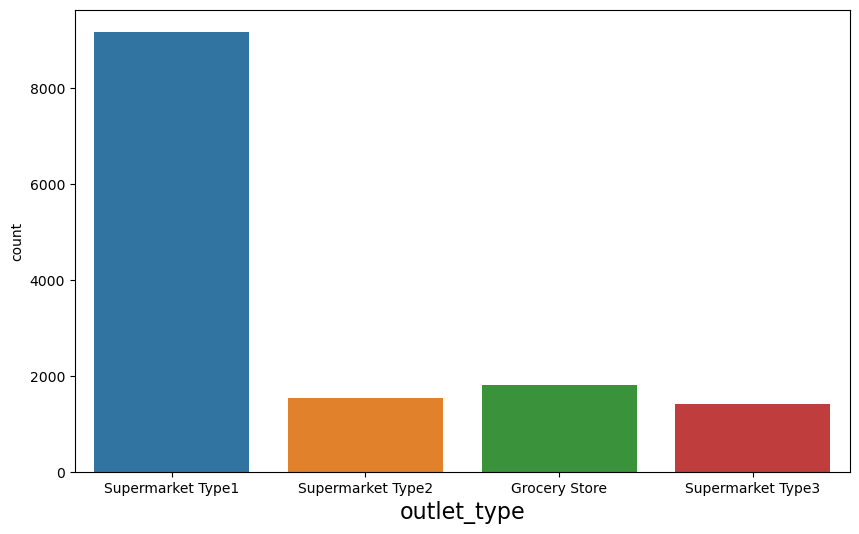

In [27]:
#So from the above figure we coulld see that fruits and vegetables and snacks are the highest selling goods, where as seafood is least selling
#lets look at the outlet_type
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('outlet_type', fontsize=16)
plt.show()

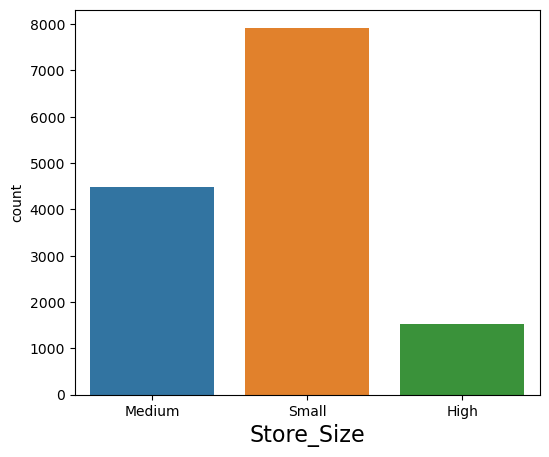

In [28]:
#We could see that supermarket type 1 is the most common store
#now lets look at the size of the store
plt.figure(figsize=(6,5))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Store_Size', fontsize=16)
plt.show()

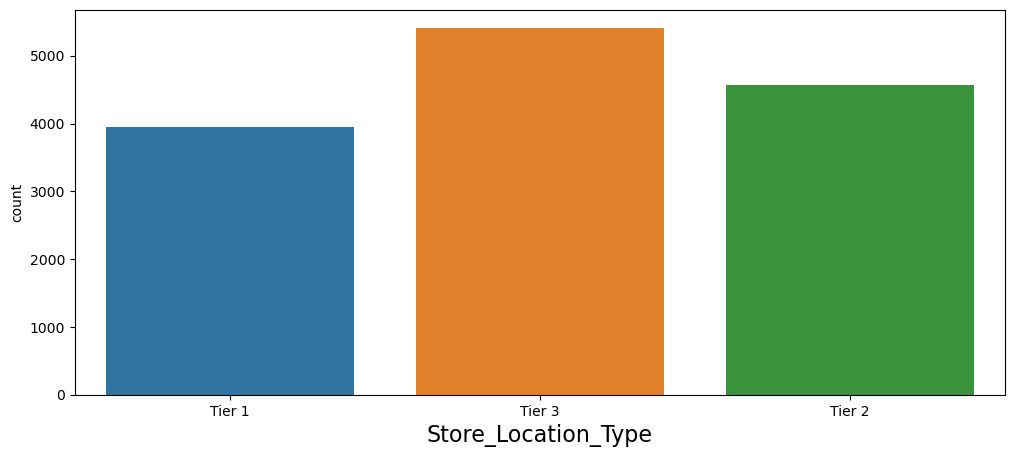

In [29]:
#looking at the above graph, its safe to say small stores are most common
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(12,5))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Store_Location_Type', fontsize=16)
plt.show()

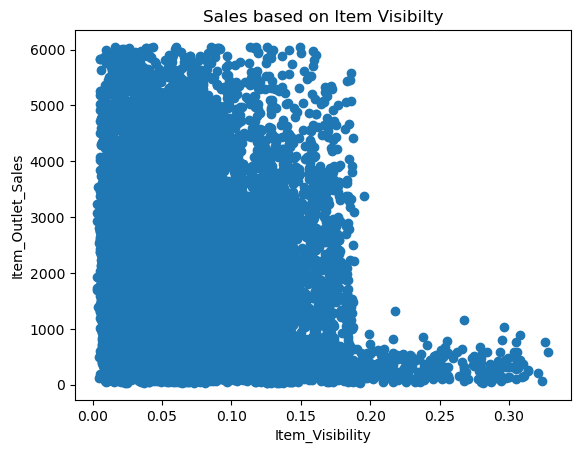

In [30]:
#Now looking at the numerical data
#First will see about Sales per Item_Visibilty
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

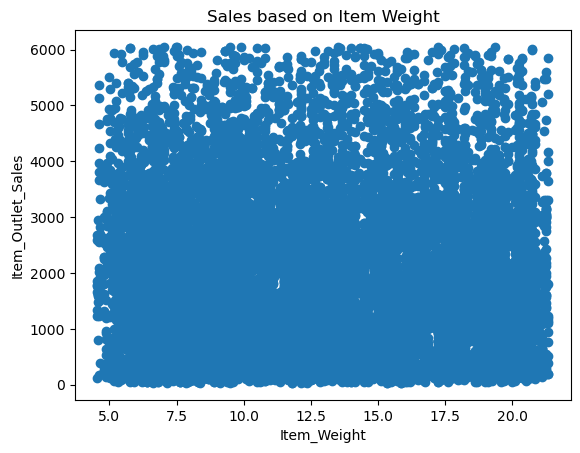

In [31]:
#From the above graph we can clearly tell, more the visiblity more the sale is.
#lets look at the item_weight
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

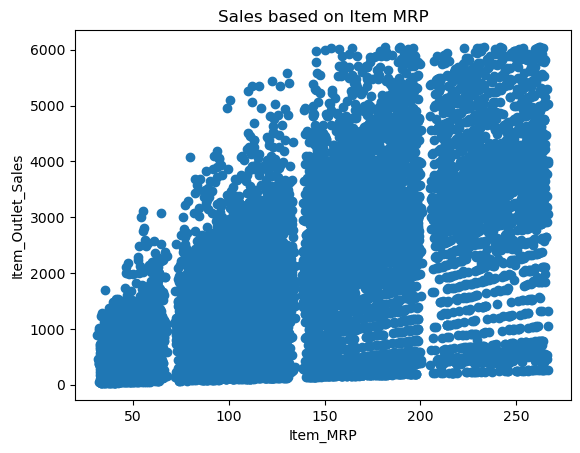

In [32]:
#From the above diagram we can not say much as the points are spread across
# looking at the Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()
#from the below graph we can say that as privce increases, sale increases.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


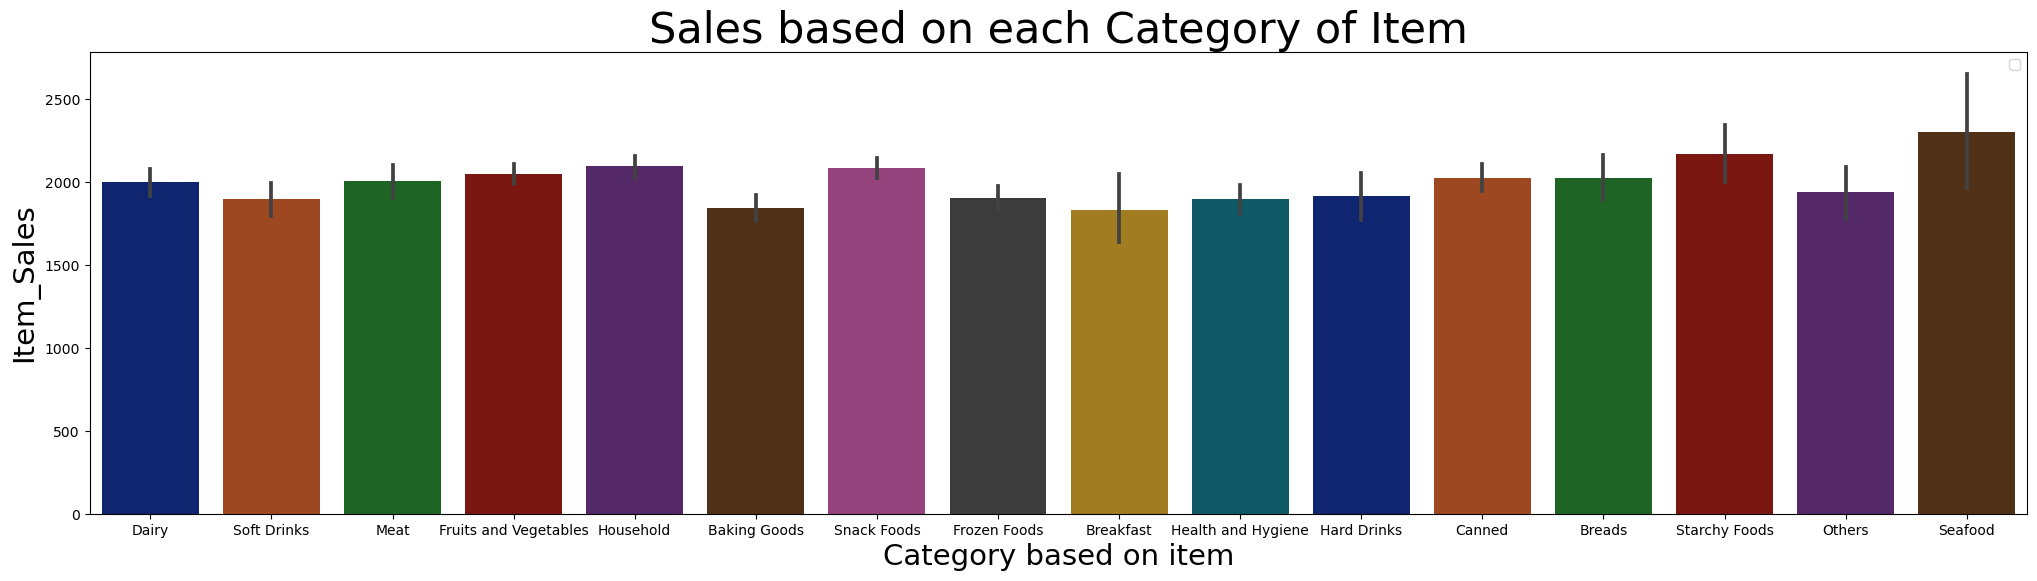

In [33]:
#What we have done till now is,we tried to underdtand the variables.
#Now lets try to underdtand how those variables are related to output variable
#First will look into sales vs item category
plt.figure(figsize=(25,6))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='dark')
plt.title('Sales based on each Category of Item', fontsize=31)
plt.xlabel('Category based on item', fontsize=21)
plt.ylabel('Item_Sales', fontsize=21)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


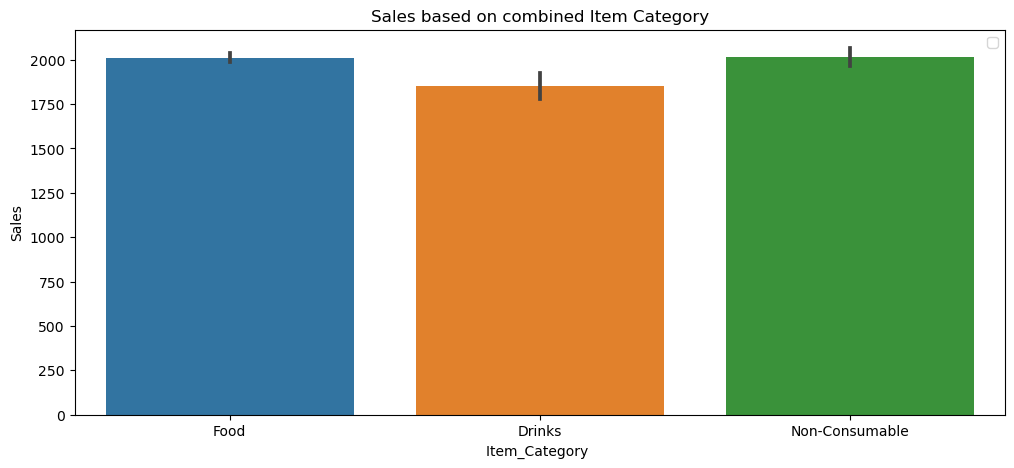

In [34]:
#Looking at the sales vs category, we could observe that almost all have similar sales
#graph for Sales versus Item Type Combined
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='Combined_Item_Type', y='Item_Outlet_Sales')
plt.title('Sales based on combined Item Category')
plt.xlabel('Item_Category ')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


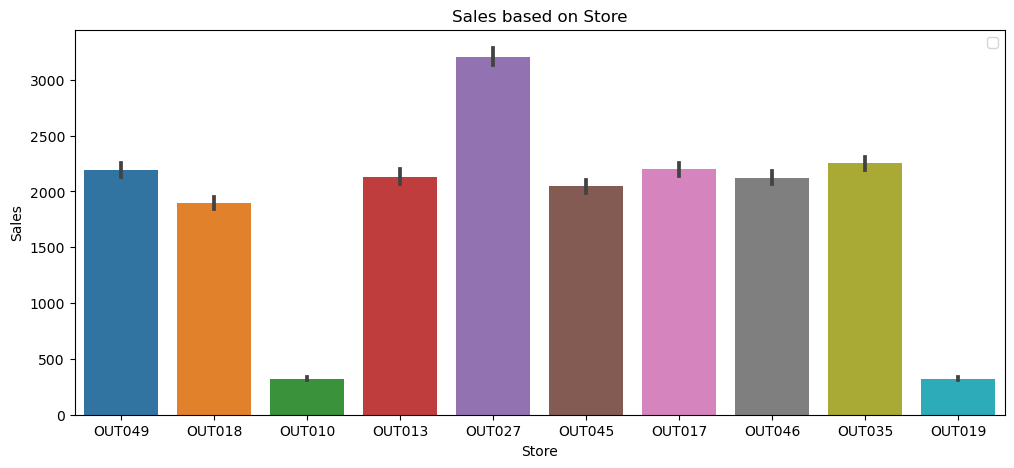

In [35]:
#looking at the above figure where combined category is plotted against sales, food is the highest selling but there is no much difference
#graph for Sales vs Outlet Identifier
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


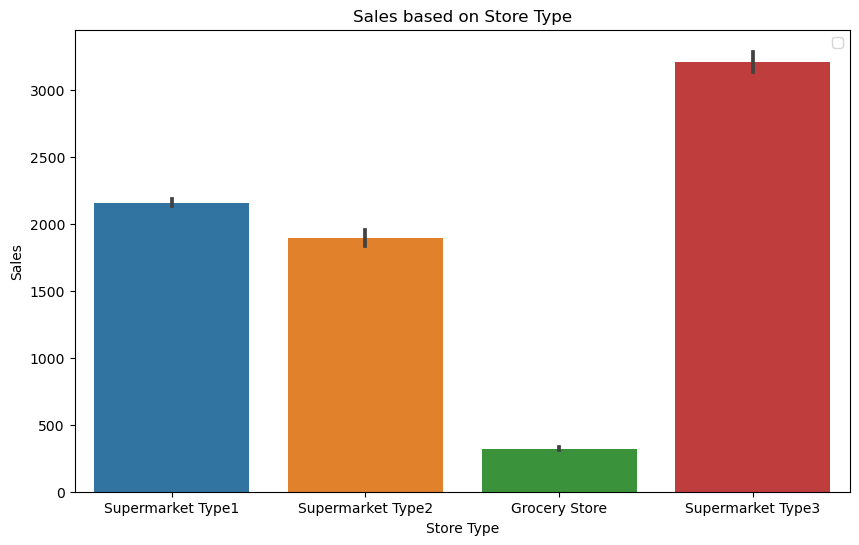

In [36]:
#By loooking at the above graph we can say that Store 27 has the highest sales and 10&19 has least sales
#Graph for sales vs Outlet Type
plt.figure(figsize=(10,6))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


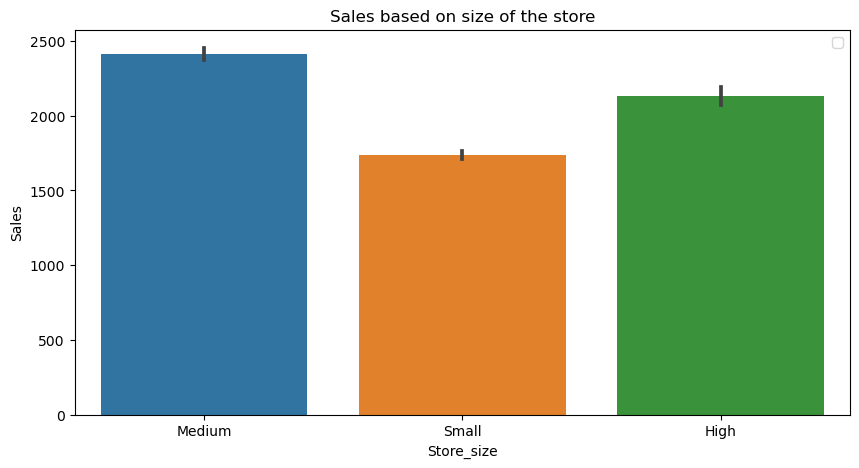

In [37]:
#From the above figure we can conclude that supermarket type 3 has highest sales among other store types
#barplot for Sales per Outlet_Size
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on size of the store')
plt.xlabel('Store_size')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


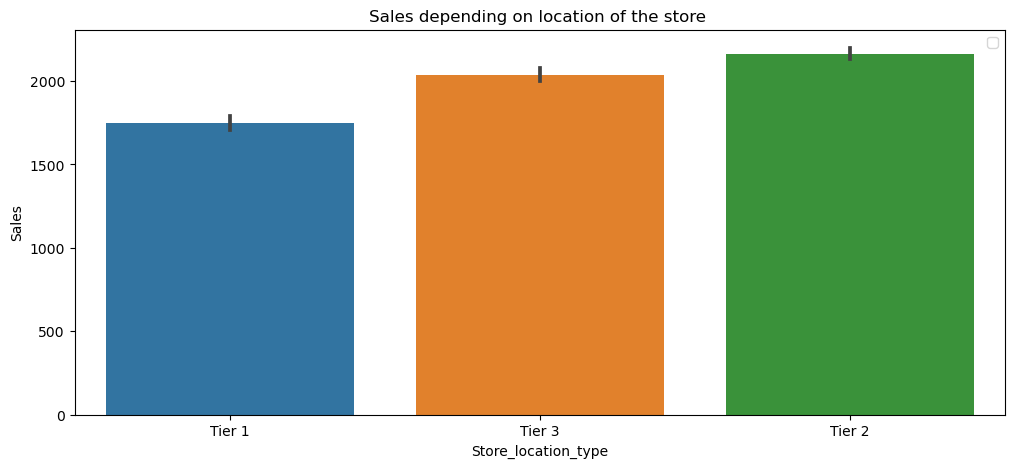

In [38]:
#from above graph we can say that store with medium size has highest sales
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales depending on location of the store ')
plt.xlabel('Store_location_type')
plt.ylabel('Sales')
plt.legend()
plt.show()
#by this we can say that tyre 2 and tyre 3 have more sales although type 2 is bit more

<AxesSubplot:>

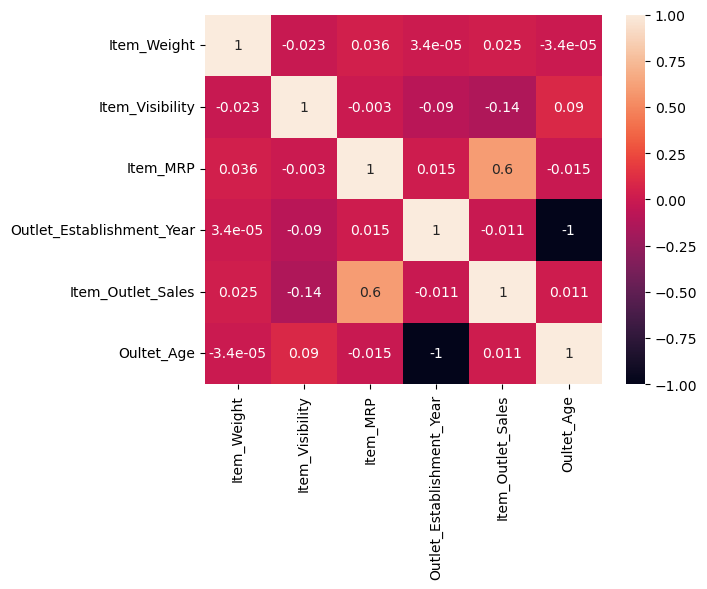

In [39]:
#Correlation Matrix
plt.Figure(figsize=(24,6))
sns.heatmap(data.corr(), annot=True)

From the above graph we can see that there is  bit of correlation between MRP and sales, and also there is high negative correlation for outlet age and item_visibility and hence we can drop them.
Also since item_identifier and outlet_identifier dont have any significance, we can leave them too.

Item_Fat_Content,Outlet_Type,Outlet_Location_Type,Outlet_Size as this 4 are ordinal data, we can transform them into 
numerical data by Transforming

In [40]:
ordinal = LabelEncoder()
columns = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
for i in columns:
    data[i] = ordinal.fit_transform(data[i])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Combined_Item_Type,Oultet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,Food,24
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,Drinks,14
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,Food,24
3,FDX07,19.20,1,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,Food,25
4,NCD19,8.93,0,0.009780,Household,53.8614,OUT013,1987,0,2,1,994.7052,Non-Consumable,36


In [41]:
#Now will transform the combined item_type as well.
columns = ['Combined_Item_Type']
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(encoder.fit_transform(data[columns])).astype('int64')
# geting the feature columns
data_oh.columns = encoder.get_feature_names_out(columns)
data_oh.index = data.index 
data_trans = pd.concat([data, data_oh], axis=1)
data_trans.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Combined_Item_Type,Oultet_Age,Combined_Item_Type_Drinks,Combined_Item_Type_Food,Combined_Item_Type_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,Food,24,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,Drinks,14,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,Food,24,0,1,0
3,FDX07,19.20,1,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,Food,25,0,1,0
4,NCD19,8.93,0,0.009780,Household,53.8614,OUT013,1987,0,2,1,994.7052,Non-Consumable,36,0,0,1


In [42]:
#Now we have transformed all the data and we can remove the unnecessary columns which are not required for model building.
data_trans = data_trans.drop(['Item_Identifier','Combined_Item_Type', 'Outlet_Identifier','Oultet_Age',
                     'Item_Fat_Content','Item_Visibility', 'Item_Type',
                     'Outlet_Establishment_Year','Item_Type'], axis=1)
data_trans.head()

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Combined_Item_Type_Drinks,Combined_Item_Type_Food,Combined_Item_Type_Non-Consumable
0,9.30,249.8092,1,0,1,3735.1380,0,1,0
1,5.92,48.2692,1,2,2,443.4228,1,0,0
2,17.50,141.6180,1,0,1,2097.2700,0,1,0
3,19.20,182.0950,2,2,0,732.3800,0,1,0
4,8.93,53.8614,0,2,1,994.7052,0,0,1


In [43]:
# Dividing Data into train and test
#Splitting the data into train and test data
features = ['Item_Weight','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Combined_Item_Type_Drinks','Combined_Item_Type_Food','Combined_Item_Type_Non-Consumable']
target=['Item_Outlet_Sales']
X = data_trans.loc[:, features]
y=data_trans.loc[:, target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)
X_train['Item_Outlet_Sales']=data_trans['Item_Outlet_Sales']
print('\nTrain Dataset for Model Buidling: \n')
print(X_train.info(verbose=True, show_counts=True))
print('\nTest Dataset for Model Buidling: \n')
print(X_test.info(verbose=True, show_counts=True)) 
X_train.head()


Train Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11140 entries, 13944 to 2822
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        11140 non-null  float64
 1   Item_MRP                           11140 non-null  float64
 2   Outlet_Size                        11140 non-null  int32  
 3   Outlet_Location_Type               11140 non-null  int32  
 4   Outlet_Type                        11140 non-null  int32  
 5   Combined_Item_Type_Drinks          11140 non-null  int64  
 6   Combined_Item_Type_Food            11140 non-null  int64  
 7   Combined_Item_Type_Non-Consumable  11140 non-null  int64  
 8   Item_Outlet_Sales                  11140 non-null  float64
dtypes: float64(3), int32(3), int64(3)
memory usage: 739.8 KB
None

Test Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64In

,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Combined_Item_Type_Drinks,Combined_Item_Type_Food,Combined_Item_Type_Non-Consumable,Item_Outlet_Sales
13944,6.195,122.2098,2,1,1,0,1,0,1699.827256
241,15.850,42.7112,2,1,1,0,0,1,639.168000
9316,5.155,249.4776,2,1,1,0,1,0,2149.817488
51,10.195,141.5154,0,2,1,0,1,0,850.892400
7724,17.750,187.6240,2,1,1,0,1,0,1491.392000


In [44]:
#Now lets start model building
#Will split the data into train and test 
y = X_train['Item_Outlet_Sales']
X = X_train.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)
# Cross Validation Score after model completion
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 5539 to 14080
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8912 non-null   float64
 1   Item_MRP                           8912 non-null   float64
 2   Outlet_Size                        8912 non-null   int32  
 3   Outlet_Location_Type               8912 non-null   int32  
 4   Outlet_Type                        8912 non-null   int32  
 5   Combined_Item_Type_Drinks          8912 non-null   int64  
 6   Combined_Item_Type_Food            8912 non-null   int64  
 7   Combined_Item_Type_Non-Consumable  8912 non-null   int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 522.2 KB


In [46]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 9311 to 8862
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        2228 non-null   float64
 1   Item_MRP                           2228 non-null   float64
 2   Outlet_Size                        2228 non-null   int32  
 3   Outlet_Location_Type               2228 non-null   int32  
 4   Outlet_Type                        2228 non-null   int32  
 5   Combined_Item_Type_Drinks          2228 non-null   int64  
 6   Combined_Item_Type_Food            2228 non-null   int64  
 7   Combined_Item_Type_Non-Consumable  2228 non-null   int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 130.5 KB


In [47]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 8912 entries, 5539 to 14080
Series name: Item_Outlet_Sales
Non-Null Count  Dtype  
--------------  -----  
8912 non-null   float64
dtypes: float64(1)
memory usage: 139.2 KB


In [48]:
#Model Building 1:Linear Regression:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#assigning the function
model_linear_regression = LinearRegression(normalize=True)

#fitting it against the train data
model_linear_regression.fit(X_train, y_train)

#predicting against the test data
y_prediction = model_linear_regression.predict(X_test)

#Evaluation metrices
rmse_lr = np.sqrt(mean_squared_error(y_test, y_prediction)) * 100 / np.mean(y_test)
mae_lr = mean_absolute_error(y_test, y_prediction) * 100 / np.mean(y_test)
aae_lr = mae_lr / (np.mean(y_test)) * 100
r2_lr = r2_score(y_test, y_prediction)

#printing the result
print('Root Mean Squared Error:', rmse_lr,)
print('Mean Absolute Error:', mae_lr,)
print('Average Absolute Error:', aae_lr,)
print('R-squared:', r2_lr,)

Root Mean Squared Error: 45.34000692255951
Mean Absolute Error: 33.842266873764636
Average Absolute Error: 1.6714489851355974
R-squared: 0.5626920539672264


The RMSE of the linear regression model is 45.01, indicating that the model's revenue forecasts are off by an average of $45.01. A MAE of 685.21 indicates that the mean absolute error in the model's predictions is $33.21. An R-squared value of 0.56 indicates that the model explains approximately 56% of the variation in the target variable.

Outlet_Location_Type                -278.769465
Outlet_Size                         -128.978691
Combined_Item_Type_Drinks            -23.548145
Combined_Item_Type_Non-Consumable     -9.311547
Item_Weight                           -0.236286
Item_MRP                              13.564931
Combined_Item_Type_Food               16.888229
Outlet_Type                          861.680065
dtype: float64


<AxesSubplot:>

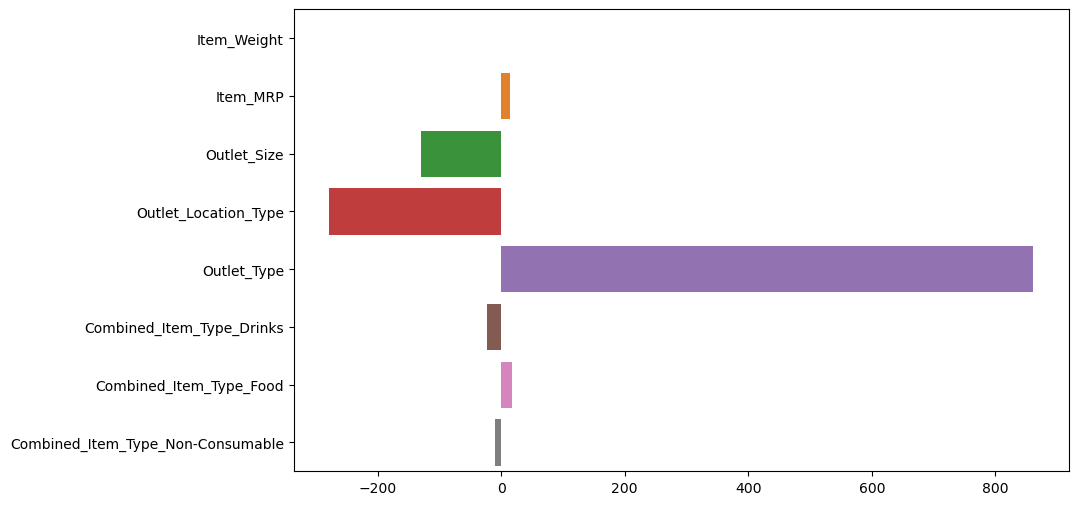

In [49]:
#Visualising the model
Linear_regression_coefficient = pd.Series(model_linear_regression.coef_, model_linear_regression.feature_names_in_).sort_values()
print(Linear_regression_coefficient)
plt.figure(figsize=(10,6))
sns.barplot(model_linear_regression.coef_,model_linear_regression.feature_names_in_)

In [50]:
#Model Building 2: Ridge Regression
#Assigning the function
model_ridge_regression = Ridge(normalize=True)

#fitting the model built against training data
model_ridge_regression.fit(X_train, y_train)

#predicting the data based on the model with the help of test data
y_prediction = model_ridge_regression.predict(X_test)

#Evaluation metrices
rmse_rd = np.sqrt(mean_squared_error(y_test, y_prediction)) * 100 / np.mean(y_test)
mae_rd = mean_absolute_error(y_test, y_prediction) * 100 / np.mean(y_test)
aae_rd = mae_rd / (np.mean(y_test)) * 100
r2_rd = r2_score(y_test, y_prediction)

#printing the result
print('Root Mean Squared Error:', rmse_rd,)
print('Mean Absolute Error:', mae_rd,)
print('Average Absolute Error:', aae_rd,)
print('R-squared:', r2_rd,)

Root Mean Squared Error: 52.95429402091838
Mean Absolute Error: 42.1077549888623
Average Absolute Error: 2.0796764178062
R-squared: 0.40347785696206906


The ridge regression results show that the model performs worse than the linear regression. The high RMSE and MAE values ​​indicate that the model's predictions are less accurate than linear regression. The R-squared value is also low, suggesting that the model does not account for the variance in the data in the same way as linear regression.

Outlet_Size                         -103.807489
Combined_Item_Type_Drinks            -42.885091
Outlet_Location_Type                 -27.670471
Item_Weight                            1.103490
Combined_Item_Type_Non-Consumable      2.507918
Item_MRP                               6.715915
Combined_Item_Type_Food               16.020871
Outlet_Type                          369.609844
dtype: float64


<AxesSubplot:>

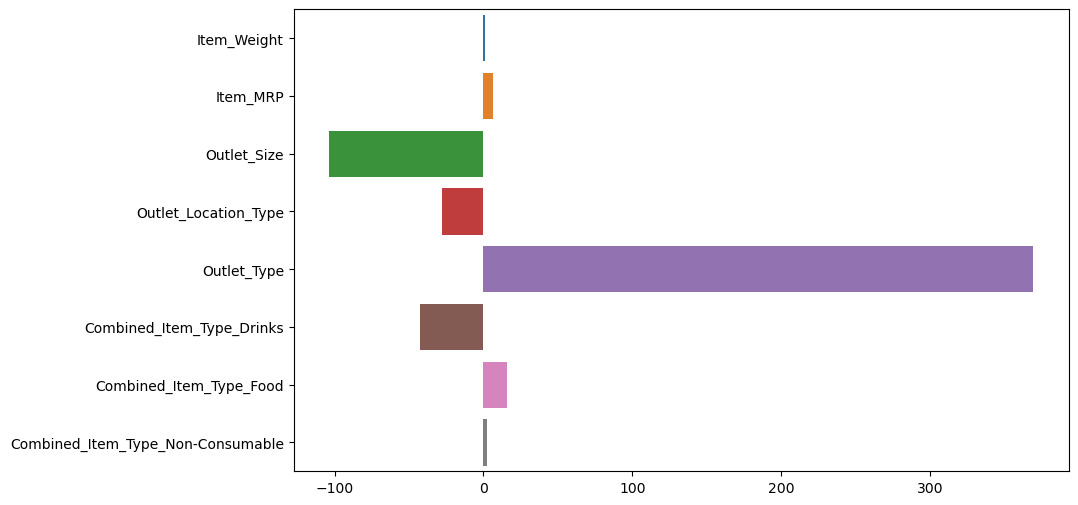

In [51]:
#Visualising the model
Ridge_regression_coefficient = pd.Series(model_ridge_regression.coef_, model_ridge_regression.feature_names_in_).sort_values()
print(Ridge_regression_coefficient)
plt.figure(figsize=(10,6))
sns.barplot(model_ridge_regression.coef_,model_ridge_regression.feature_names_in_)

Again the r s quared value is some what near to 0.5, so we can consider the this model as good and outlet_type is the most significant variable here.
Most important thing we can observe is here the coeficcient value has been reduced drastically compared to linear regression 
which basically is the reason we used this model.

In [52]:
#Model building 3: Decision tree
#Assigning the function
model_decision_tree = DecisionTreeRegressor(max_depth=18, min_samples_leaf=100)

#fitting the model built against training data
model_decision_tree.fit(X_train, y_train)

#predicting the data based on the model with the help of test data
y_prediction = model_decision_tree.predict(X_test)

#Evaluation metrices
rmse_dt = np.sqrt(mean_squared_error(y_test, y_prediction)) * 100 / np.mean(y_test)
mae_dt = mean_absolute_error(y_test, y_prediction) * 100 / np.mean(y_test)
aae_dt = mae_dt / (np.mean(y_test)) * 100
r2_dt = r2_score(y_test, y_prediction)

#printing the result
print('Root Mean Squared Error:', rmse_dt,)
print('Mean Absolute Error:', mae_dt,)
print('Average Absolute Error:', aae_dt,)
print('R-squared:', r2_dt,)

Root Mean Squared Error: 37.912947584531324
Mean Absolute Error: 25.296000348318827
Average Absolute Error: 1.2493540774883636
R-squared: 0.6942268794812977


Decision tree models have lower RMSE, MAE, and MSE compared to linear and ridge regression models, indicating that they may be superior in terms of accuracy. The R-squared value is also relatively high, indicating that the model explains a significant proportion of the target variable's variance. However, cross-validation results show that the performance of the decision tree model is not as consistent as the linear and ridge regression models, with lower mean scores. This may be because decision trees tend to overfit the training data, resulting in poor performance on new data. 

Item_MRP                             0.537139
Outlet_Type                          0.458643
Item_Weight                          0.002333
Outlet_Location_Type                 0.000850
Outlet_Size                          0.000624
Combined_Item_Type_Non-Consumable    0.000231
Combined_Item_Type_Food              0.000181
Combined_Item_Type_Drinks            0.000000
dtype: float64


<AxesSubplot:>

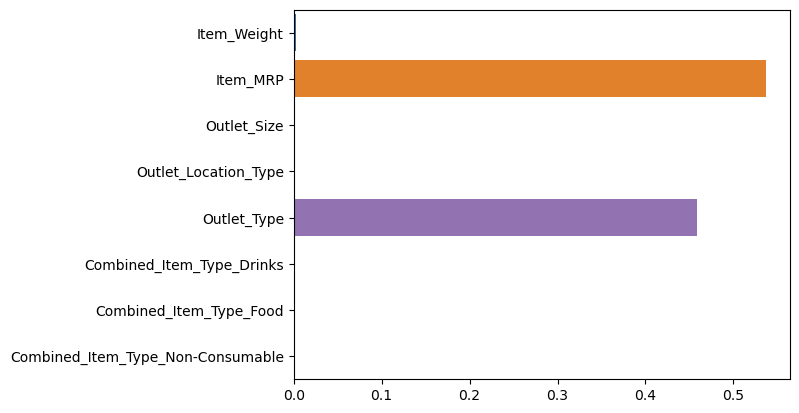

In [53]:
#visualising the model
Decision_tree_coef = pd.Series(model_decision_tree.feature_importances_, model_decision_tree.feature_names_in_).sort_values(ascending=False)
print(Decision_tree_coef)
sns.barplot(model_decision_tree.feature_importances_, model_decision_tree.feature_names_in_)

So from the above graph we can tell that MRP and outley types are the once which are contributing to the sales and all the others are negligible.

In [54]:
#Model building 4: Random Forest
#Assigning the function
model_rf = RandomForestRegressor(n_estimators=600, max_depth=12, min_samples_leaf=100, n_jobs=4, random_state=101)

#fitting the model built against training data
model_rf.fit(X_train, y_train)

#predicting the data based on the model with the help of test data
y_prediction = model_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_prediction)) * 100 / np.mean(y_test)
mae_rf = mean_absolute_error(y_test, y_prediction) * 100 / np.mean(y_test)
aae_rf = mae_rf / (np.mean(y_test)) * 100
r2_rf = r2_score(y_test, y_prediction) 

print('Root Mean Squared Error:', rmse_rf,)
print('Mean Absolute Error:', mae_rf,)
print('Average Absolute Error:', aae_rf,)
print('R-squared:', r2_rf,)

Root Mean Squared Error: 37.804578400129465
Mean Absolute Error: 25.101960381284847
Average Absolute Error: 1.2397705614909136
R-squared: 0.6959724058931986


The random forest model performed slightly better than the decision tree model in terms of RMSE, MAE, MSE, and R-squared values. RMSE is 37.44, MAE is 25.25 and AAE is also 1.25. The R-squared value is 0.696. This means that the model explains 69.6% of the target variable variance. This shows that the random forest model can capture more variability in the data than the decision tree model. Therefore, a random forest model is better suited than a decision tree model for this data set. 

Item_MRP                             0.540973
Outlet_Type                          0.452951
Item_Weight                          0.003143
Outlet_Location_Type                 0.001604
Outlet_Size                          0.000640
Combined_Item_Type_Non-Consumable    0.000359
Combined_Item_Type_Food              0.000331
Combined_Item_Type_Drinks            0.000000
dtype: float64


<AxesSubplot:>

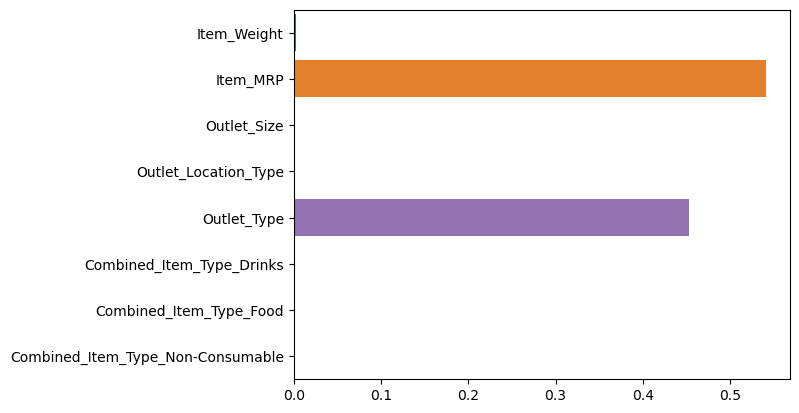

In [55]:
# visualizing the model
Model_RFR_coef = pd.Series(model_rf.feature_importances_, model_rf.feature_names_in_).sort_values(ascending=False)
print(Model_RFR_coef)
sns.barplot(model_rf.feature_importances_, model_rf.feature_names_in_)

So from the above graph we can tell that MRP and outley types are the once which are contributing to the sales and all the others are negligible.

In [56]:
#Model building 5: XG Boost
#Assigning the function
model_XG_Boost = XGBRegressor()

#fitting the model built against training data
model_XG_Boost.fit(X_train, y_train)

#predicting the data based on the model with the help of test data
y_prediction = model_XG_Boost.predict(X_test)

#Calculating evaluation metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_prediction)) * 100 / np.mean(y_test)
mae_xgb = mean_absolute_error(y_test, y_prediction) * 100 / np.mean(y_test)
aae_xgb = mae_xgb / (np.mean(y_test)) * 100
r2_xgb = r2_score(y_test, y_prediction) 

# Print evaluation metrics
print('Root Mean Squared Error:', rmse_xgb,)
print('Mean Absolute Error:', mae_xgb,)
print('Average Absolute Error:', aae_xgb,)
print('R-squared:', r2_xgb,)

Root Mean Squared Error: 39.57898110029321
Mean Absolute Error: 26.20281134119694
Average Absolute Error: 1.2941409210946033
R-squared: 0.6667628403938286


The XGBoost model has the best performance in terms of evaluation metrics. It has the lowest RMSE and MAE scores, indicating the least error in prediction. The R-squared value is also higher for the XGBoost model compared to the other models, indicating that it explains more of the variance of the target variable. In addition, the average cross-validation score of the XGBoost model is also higher. Overall, the XGBoost model outperforms the others and is the best choice for making predictions on this dataset.  

In [57]:
import pandas as pd

# Create a list of model names
models = ['Linear Regression', 'Ridge Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Create a dictionary of model metrics
metrics = {
    'RMSE': [rmse_lr, rmse_rd, rmse_dt, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_rd, mae_dt, mae_rf, mae_xgb],
    'AAE': [aae_lr, aae_rd, aae_dt, aae_rf, aae_xgb],
    'R-Squared': [r2_lr, r2_rd, r2_dt, r2_rf, r2_xgb]
}

# Create a pandas DataFrame from the dictionary of model metrics
df = pd.DataFrame(metrics, index=models)

# Print the DataFrame
print(df)

                        RMSE        MAE       AAE  R-Squared
Linear Regression  45.340007  33.842267  1.671449   0.562692
Ridge Regression   52.954294  42.107755  2.079676   0.403478
Decision Tree      37.912948  25.296000  1.249354   0.694227
Random Forest      37.804578  25.101960  1.239771   0.695972
XGBoost            39.578981  26.202811  1.294141   0.666763


Based on the given table, we can draw the following conclusions:

Decision Tree and Random Forest models have lower RMSE and MAE values compared to linear and ridge regression, indicating better accuracy in predicting the target variable.

All models show significant improvement in R-Squared compared to a simple baseline model, with the Random Forest and XGBoost models having the highest R-Squared values.

Among the models, the XGBoost model has the lowest RMSE and MAE values, indicating better accuracy than the other models.

Overall, the Decision Tree, Random Forest, and XGBoost models outperform the linear and ridge regression models in predicting the target variable.